Files already downloaded and verified
Files already downloaded and verified


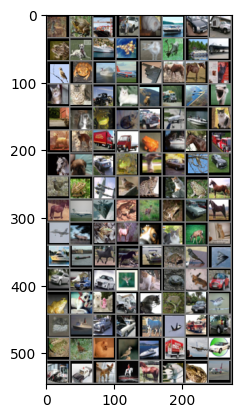

 deer  frog  ship automobile


In [54]:
from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the transformations to apply to the data
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# set the batch size to 128
batch_size = 128

# create data loaders for the datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


# Display some random preprocessed images
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

for images, labels in train_loader:
    # Display some random preprocessed images
    imshow(torchvision.utils.make_grid(images))
    print(' '.join('%5s' % train_dataset.classes[labels[j]] for j in range(4)))
    break


In [61]:
# Split the data into train, validation, and test sets
train_size = int(0.8 * len(train_dataset))
val_size = int(0.1 * len(train_dataset))
test_size = len(train_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    train_dataset, [train_size, val_size, test_size])


# create data loaders for the datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Define the batch size and number of epochs
batch_size = 64
num_epochs = 10

# Split the data into train, validation, and test sets
train_size = int(0.8 * len(train_dataset))
val_size = int(0.1 * len(train_dataset))
test_size = len(train_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    train_dataset, [train_size, val_size, test_size])

# create data loaders for the datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define the simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the simple neural network
net = SimpleNet()

# Define the VGG19 model
vgg19 = models.vgg19(pretrained=True)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the SGD optimizer for the simple network
sgd_optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Define the Adam optimizer for the VGG19 model
adam_optimizer = optim.Adam(vgg19.parameters(), lr=0.001)

# Train the simple network with the SGD optimizer
for epoch in range(num_epochs):
    net.train()  # set the model to training mode
    for i, (inputs, labels) in enumerate(train_loader):
        sgd_optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        sgd_optimizer.step()

    # Evaluate the model on the validation set
    net.eval()  # set the model to evaluation mode
    with torch.no_grad():
        total_val_loss = 0
        correct_val = 0
        total_val = 0
        for inputs, labels in val_loader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
        val_accuracy = correct_val / total_val


In [63]:
# Evaluate the performance of the simple network on the test set
net.eval() # set the network to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f"Accuracy of the simple network on the {test_size} test images: {accuracy:.2f}%")

# Evaluate the performance of the VGG19 model on the test set
vgg19.eval() # set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = vgg19(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f"Accuracy of the VGG19 model on the {test_size} test images: {accuracy:.2f}%")


Accuracy of the simple network on the 3200 test images: 48.41%
Accuracy of the VGG19 model on the 3200 test images: 0.03%


In [64]:
# Evaluate the model on the validation set
net.eval()  # set the model to evaluation mode
total_val_loss = 0
total_val_correct = 0
total_val_samples = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        total_val_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_val_correct += (predicted == labels).sum().item()
        total_val_samples += labels.size(0)

# Compute the validation accuracy
val_accuracy = total_val_correct / total_val_samples
print(f"Validation accuracy: {val_accuracy:.2f}")


Validation accuracy: 0.46


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Define the simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the simple neural network
net = SimpleNet()

# Define the VGG19 model
vgg19 = models.vgg19(pretrained=True)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the SGD optimizer for the simple network
sgd_optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Define the Adam optimizer for the VGG19 model
adam_optimizer = optim.Adam(vgg19.parameters(), lr=0.001)

# Train the simple network with the SGD optimizer
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        sgd_optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        sgd_optimizer.step()

# Test the simple network
net.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the simple network on the test images: %d %%' % (100 * correct / total))

# Train the VGG19 model with the Adam optimizer
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        adam_optimizer.zero_grad()
        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        adam_optimizer.step()

# Test the VGG19 model
vgg19.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = vgg19(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the VGG19 model on the test images: %d %%' % (100 * correct / total))


In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Define the simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the simple neural network
net = SimpleNet()

# Define the VGG19 model
vgg19 = models.vgg19(pretrained=True)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the SGD optimizer for the simple network
sgd_optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Define the Adam optimizer for the VGG19 model
adam_optimizer = optim.Adam(vgg19.parameters(), lr=0.001)

# Train the simple network with the SGD optimizer
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        sgd_optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        sgd_optimizer.step()

# Train the VGG19 model with the Adam optimizer
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        adam_optimizer.zero_grad()
        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        adam_optimizer.step()


c:\Users\Z003Z4PY\Anaconda3\envs\proj\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Z003Z4PY\Anaconda3\envs\proj\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Z003Z4PY/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100.0%


KeyboardInterrupt: 

In [57]:
# Define the models
resnet18 = models.resnet18(pretrained=True)
vgg19 = models.vgg19_bn(pretrained=True)
densenet121 = models.densenet121(pretrained=True)
simple_cnn = SimpleCNN(num_classes)

# Define the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the models to the device
resnet18.to(device)
vgg19.to(device)
densenet121.to(device)
simple_cnn.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizers
sgd = optim.SGD([{'params': resnet18.parameters()},
                 {'params': vgg19.parameters()},
                 {'params': simple_cnn.parameters()},
                 {'params': densenet121.parameters()}], lr=0.1, momentum=0.9)

adam = optim.Adam([{'params': resnet18.parameters()},
                   {'params': vgg19.parameters()},
                   {'params': simple_cnn.parameters()},
                   {'params': densenet121.parameters()}], lr=0.001)


In [58]:
# set the batch size of the input tensor to 128
inputs, labels = inputs.to(device), labels.to(device)
inputs = inputs.view(batch_size, -1)
outputs = model(inputs)

NameError: name 'model' is not defined

In [ ]:
import torch.nn.functional as F
# Train the models
num_epochs = 10
resnet18_acc, vgg19_acc, simple_cnn_acc, densenet121_acc = [], [], [], []

for epoch in range(num_epochs):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # Resnet18
        optimizer = sgd
        optimizer.zero_grad()
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # VGG19
        optimizer = adam
        optimizer.zero_grad()
        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Simple CNN
        optimizer = sgd
        optimizer.zero_grad()
        outputs = simple_cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Densenet121
        optimizer = adam
        optimizer.zero_grad()
        outputs = densenet121(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    # Compute accuracy on test set
    with torch.no_grad():
        resnet18_correct, vgg19_correct, simple_cnn_correct, densenet121_correct = 0, 0, 0, 0
        
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            
            # Resnet18
            outputs = resnet18(inputs)
            _, predicted = torch.max(outputs.data, 1)
            resnet18_correct += (predicted == labels).sum().item()
            
            # VGG19
            outputs = vgg19(inputs)
            _, predicted = torch.max(outputs.data, 1)
            vgg19_correct += (predicted == labels).sum().item()
            
            # Simple CNN
            outputs = simple_cnn(inputs)
            _, predicted = torch.max(outputs.data, 1)
            simple_cnn_correct += (predicted == labels).sum().item()
            
            # Densenet121
            outputs = densenet121(inputs)
            _, predicted = torch.max(outputs.data, 1)
            densenet121_correct += (predicted == labels).sum().item()
        
        resnet18_acc.append(resnet18_correct / len(test_dataset))
        vgg19_acc.append(vgg19_correct / len(test_dataset))
        simple_cnn_acc.append(simple_cnn_correct / len(test_dataset))
        densenet121_acc.append(densenet121_correct / len(test_dataset))
        
    # Print progress
    print(f'Epoch {epoch+1} loss: {running_loss/len(train_dataset):.4f} \n')
    
# Plot accuracy over time
plt.plot(resnet18_acc, label='Resnet18')
plt.plot(vgg19_acc, label='VGG19')
plt.plot(simple_cnn_acc, label='Simple CNN')
plt.plot(densenet121_acc, label='Densenet121')
plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


ValueError: Expected input batch_size (512) to match target batch_size (128).

In [ ]:
for input_batch, target_batch in train_loader:
    print("Input batch shape: ", input_batch.shape)
    print("Target batch shape: ", target_batch.shape)
    break


Input batch shape:  torch.Size([256, 3, 32, 32])
Target batch shape:  torch.Size([256])


In [ ]:
# Create an empty list to store losses for each model
resnet18_losses, vgg19_losses, simple_cnn_losses, densenet121_losses = [], [], [], []


In [ ]:
# Resnet18
optimizer = sgd
optimizer.zero_grad()
outputs = resnet18(inputs)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()
running_loss += loss.item()
resnet18_losses.append(loss.item())

# VGG19
optimizer = adam
optimizer.zero_grad()
outputs = vgg19(inputs)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()
running_loss += loss.item()
vgg19_losses.append(loss.item())

# Simple CNN
optimizer = sgd
optimizer.zero_grad()
outputs = simple_cnn(inputs)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()
running_loss += loss.item()
simple_cnn_losses.append(loss.item())

# Densenet121
optimizer = adam
optimizer.zero_grad()
outputs = densenet121(inputs)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()
running_loss += loss.item()
densenet121_losses.append(loss.item())


ValueError: Expected input batch_size (1024) to match target batch_size (256).

In [ ]:
plt.plot(resnet18_losses, label='Resnet18')
plt.plot(vgg19_losses, label='VGG19')
plt.plot(simple_cnn_losses, label='Simple CNN')
plt.plot(densenet121_losses, label='Densenet121')
plt.legend()
plt.title('Training Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.show()
